# K-means from scratch Implementation
<em><b>(Implementation of K-means, a clustering machine learning algorithm in the case of Unsupervised learning from scratch)</b></em><br>
Some K-means explanation resources, <a href="https://www.sciencedirect.com/science/article/pii/S1875389212006220">A Clustering Method Based on K-Means Algorithm</a>,
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html">scikit-learn K-means</a>, 
<a href="https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68">The 5 Clustering Algorithms Data Scientists Need to Know</a>

In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Compute euclidean distance
<em>This function allows computiting the distance between two given points</em>

In [2]:
def euclidean_distance(X, Y):
    """
    Compute euclidean distance between X and Y
    
    Arg(s):
        X(array): X_coordinates
        Y(array): Y_coordinates
    Return(s):
        distance(float): The distance between X and Y
    """
    try:
        if len(X) == len(Y):
            distance = 0
            for (x, y) in zip(X, Y):
                distance +=(y - x)**2
                
            return np.round(math.sqrt(distance), 3)
        else:
            print("The two vectors do not have the same length ... !")
            return 0
            
    except Exception as e:
        print('The vectors must be arry or list ... !')

###     Get randomly the controid values
<em>This function randomly returns the centroids value picked from the data set </em>

In [3]:
def get_centroids(dataset, n_cluster, random_state):
    """
    Getting randomly centroids values
    
    Arg(s):
        dataset(numpy.array): The whole observations to cluster
        n_cluster(int): The number of clusters chosen
        random_state(integer)
    Return(s):
        centroids(nump.array): The randomly picked centroids
    """
    np.random.seed(random_state)
    centroids = []
    rows = dataset.shape[0]
    
    for _ in range(n_cluster):
        centroid_index = np.random.randint(0, rows)
        centroids.append(dataset[centroid_index])
        
    return np.array(centroids)

### Get the index of the minimum value in a given array
<em>    Given an array of at least two values, return the index of the minimim value that it contains </em>

In [4]:
def get_min_index(array):
    """
    Given an array of at least two values, return the index of the minimim value that it contains

    Arg(s):
        array(array): The list of values where to get the index of the minimum value
    Return(s):
        index(integer): The index of the minimum value that is in the array
    """
    
    if len(array) >= 2:
        min_value = array[0]
        index = 0

        for i in range(len(array)):
            if min_value > array[i]:
                min_value = array[i]
                index = i

        return index
    else:
        return ("Warning ! The array must contain at least two values ... !")

### Clustering data of a given dataset using the randomly picked centroids
<em>Clustering data points using the euclidean distance between the observs and the centroid points. Each data point is classified by computing the distance between that point and each <b>groud center(centroid)</b>.</em>

In [5]:
def clustering(df_values, centroids, n_clusters):
    """
    Clustering data points using the euclidean distance between the observs and the centroid points
    
    Arg(s):
        df_values(np.array): The observations to cluster
        centroids(list): The centroid values
        n_clusters(integer): The number of clusters chosen
    Return(s):
        data_per_cluster(list): The clusters of the whole observations
        cluster_indexes(list): The clusters' indexes
    """
    
    data = df_values
    distances_per_cluster = {}  
    for k_cluster in range(n_clusters):
        k_cluster_dist = []
        
        for observation in data:
            k_cluster_dist.append(euclidean_distance(observation, centroids[k_cluster]))
            
        distances_per_cluster[f'k_{k_cluster}'] = k_cluster_dist
        
    """
    In this data set below(distances), every column represent a k cluster. The row represents
    the distance between one observation and the whole k clusters.
    """
    distances = pd.DataFrame(data = distances_per_cluster).values
    
    """
    Classifying observation, data
    """
    cluster_indexes = []
    for row in distances:
        cluster_indexes.append(get_min_index(row))

    data_per_cluster = []
    for k_cluster in range(n_clusters):
        classified_observs = []
        
        for k in range(len(cluster_indexes)):
            if k_cluster == cluster_indexes[k]:
                
                classified_observs.append(data[k])
                
        data_per_cluster.append(np.array(classified_observs))
        
    return data_per_cluster, cluster_indexes

### Getting the centroid as the mean of each previous cluster
<em>    Getting the centroid as the mean of each previous cluster as the new centroid </em>

In [6]:
def get_centroids_mean(data):
    """
    Getting the centroid as the mean of each previous cluster as the new centroid
    
    Arg(s):
        data(list): This is especially the return of clustering function
    Return(s):
        centroids(np.array): The centroids as means of the previously clustered
        data(observations)
    """
    
    n_clusters = len(data)
    centroids = []
    
    for k_cluster in range(n_clusters):
        centroids.append(data[k_cluster].mean(axis=0))
        
    return np.array(centroids)

### Run K-means clustering n_iterations times
<em>    Run K-means clustering n_iterations times </em>

In [7]:
def fit(data, n_clusters=3, n_iterations=3, random_state=17):
    """
    Run K-means clustering n_iterations times
    
    Arg(s):
        data(np.array): The data to cluster
        n_clusters(inetger): The number of clusters chosen
        n_iterations(integer): The n times K-means runs
    Return(s):
        clusters(list): The clusters after fitting
        cluster_indexes(list): The clusters' indexes
        centroids(np.array): The centroids of those clusters
    """
    centroids = get_centroids(data, n_cluster=n_clusters, random_state=47)
    clusters, cluster_indexes = clustering(data, centroids, n_clusters=n_clusters)

    if n_iterations <= 0:
        print("The number of n_iterations must be at least 2 ... !")

    elif n_iterations == 1:
        return clusters, cluster_indexes, centroids
    else:
        for _ in range(n_iterations):
            centroids = get_centroids_mean(clusters)
            clusters,  = clustering(data, centroids, n_clusters=n_clusters)
            
        return clusters, cluster_indexes, centroids

In [8]:
clustering, get_centroids, get_centroids_mean, fit

(<function __main__.clustering(df_values, centroids, n_clusters)>,
 <function __main__.get_centroids(dataset, n_cluster, random_state)>,
 <function __main__.get_centroids_mean(data)>,
 <function __main__.fit(data, n_clusters=3, n_iterations=3, random_state=17)>)

## Run tests on samples

In [9]:
help(fit)

Help on function fit in module __main__:

fit(data, n_clusters=3, n_iterations=3, random_state=17)
    Run K-means clustering n_iterations times
    
    Arg(s):
        data(np.array): The data to cluster
        n_clusters(inetger): The number of clusters chosen
        n_iterations(integer): The n times K-means runs
    Return(s):
        clusters(list): The clusters after fitting
        cluster_indexes(list): The clusters' indexes
        centroids(np.array): The centroids of those clusters



# Regrouping previous in a class (KMeansFromScratch)
<em>(This is done in order to handle or process or perform prediction )</em>

In [50]:
class KMeansFromScratch(object):
    """
    Implementation of K-means, a clustering machine learning algorithm in the case of
    Unsupervised learning from scratch !
    
    Attributes:
        n_clusters(integer): The number of cluster chosen
        n_iterations(integer): The number of iterations to run the algorithm
        random_state(integer)
        centroids_(list): This is a class attribute that contains the centroid values after
        clusters_(list): List of clustered data
        training(fit)
    """
    centroids_ = []
    
    def __init__(self, n_clusters, n_iterations, random_state):
        self.n_clusters = n_clusters
        self.n_iterations = n_iterations
        self.random_state = random_state
        
    def euclidean_distance(self, X, Y):
        """
        Compute euclidean distance between X and Y

        Arg(s):
            X(array): List of coordinates
            Y(array): List of coordinates
        Return(s):
            distance(float): The distance between X and Y
        """
        try:
            distance = 0
            if len(X) == len(Y):
                for (x, y) in zip(X, Y):
                    distance +=(y - x)**2

                return math.sqrt(distance)
            else:
                return("The args vectors do not have the same length... !")

        except Exception as e:
            print('The vectors must be arry or list ... !')
            
    def get_centroids(self, dataset):
        """
        Getting randomly centroids values

        Arg(s):
            dataset(numpy.array): The whole observations to cluster
        Return(s):
            centroids(nump.array): The randomly picked centroids
        """
        np.random.seed(self.random_state)
        centroids = []
        rows = dataset.shape[0]

        for _ in range(self.n_clusters):
            centroid_index = np.random.randint(0, rows)

            centroids.append(dataset[centroid_index])

        return np.array(centroids)
    
    def get_min_index(slef, array):
        """
        Given an array of at least two values, return the index of the minimim valu that
        it contains

        Arg(s):
            array(array): The list of values where to get the index of the minimum value
        Return(s):
            index(integer): The index of the minimum value that is in the array
        """

        if len(array) >= 2:
            min_value = array[0]
            index = 0

            for i in range(len(array)):
                if min_value > array[i]:
                    min_value = array[i]
                    index = i

            return index
        else:
            return("Warning ! The array must contain at least two values ... !")
    
    def get_centroids_mean(self, data):
        """
        Getting the centroid as the mean of each previous cluster as the new centroid

        Arg(s):
            data(np.array): This is especially the return of clustering function
        Return(s):
            centroids(np.array): The centroids as means of the previously clustered
        """

        centroids = []

        for k_cluster in range(self.n_clusters):
            centroids.append(data[k_cluster].mean(axis=0))

        return np.array(centroids)

        
    def clustering(self, data, centroids):
        """
        Clustering data points using the euclidean distance between the observs and the
        centroid points

        Arg(s):
            data(np.array): The observations to cluster
            centroids(nump.array): The randomly picked centroids
        Return(s):
            data_per_cluster(list): The clusters of the whole observations
            cluster_indexes(list): The clusters' indexes
        """

        temp = {}
        for k_cluster in range(self.n_clusters):
            liste = []

            for observation in data:
                liste.append(self.euclidean_distance(observation, centroids[k_cluster]))

            temp[f'k_{k_cluster}'] = liste

        """
        In this data set below(distances), every column represents a k cluster.
        The row represents. The distance between one observation and the whole k clusters.
        """
        distances = pd.DataFrame(data = temp).values

        """
        Clustering observation, data
        """
        cluster_indexes = []
        for row in distances:
            cluster_indexes.append(self.get_min_index(row))

        data_per_cluster = []
        for k_cluster in range(self.n_clusters):
            classified_observs = []

            for index in range(len(cluster_indexes)):
                if k_cluster == cluster_indexes[index]:
                    classified_observs.append(data[index])

            data_per_cluster.append(np.array(classified_observs))

        return data_per_cluster, cluster_indexes
    
    def fit(self, data):
        """
        Run K-means clustering n_iterations times

        Arg(s):
            data(np.array): The data to cluster
        Return(s):
            (list): The clusters after fitting
            cluster_indexes(list): The clusters' indexes
        """
        try:
            centroids = self.get_centroids(data)
            clusters, cluster_indexes = self.clustering(data, centroids)
            
            if self.n_iterations <= 0:
                print("The number of iterations must be at least 3 ... !")

            elif self.n_iterations == 1:
                KMeansFromScratch.centroids_ = centroids
                KMeansFromScratch.clusters_ = clusters
                
                return clusters, cluster_indexes
            else:
                for _ in range(self.n_iterations):
                    centroids = self.get_centroids_mean(clusters)
                    clusters, cluster_indexes = self.clustering(data, centroids) 
                    
                KMeansFromScratch.centroids_ = centroids
                KMeansFromScratch.clusters_ = clusters
                
                return clusters, cluster_indexes

        except Exception as e:
            print(f"""This {e} has been returned ! The variable data must have the wrong
            data structure ... !\n Please check the fit function args type by running help(fit)
            ... !""")
            
    def inertia(self):
        """
        This computes the inertia value, the lower is the inertia, the better the model is.
        Sum squares of the difference of each data point and its closest centroid.
        
        Return(s):
            inertia_value(float): The inertia value
        """
        centroids = KMeansFromScratch.centroids_
        clusters = KMeansFromScratch.clusters_
        inertia_value = 0
        
        for index in range(self.n_clusters):
            
            for cluster_row in clusters[index]:
                inertia_value +=np.linalg.norm(cluster_row - centroids[index])**2
                
        return inertia_value
    
    
    def predict(self, new_entry):
        """
        Predicting a new data point after training the model
        
        Arg(s):
            new_entry(list): The new data point to predict using the built model
        Return(s):
            (str): The answer of the prediction
        """
        try:
            distances = []
            centroids = KMeansFromScratch.centroids_
            
            if len(centroids) != 0:
                for centroid in centroids:
                    distances.append(self.euclidean_distance(centroid, new_entry))
                
                cluster = self.get_min_index(distances)
                print(f""" This data point {new_entry} belongs to the cluster {cluster+1}, and distances between
                centroids are {distances} !""")
                
            else:
                print(""" Oops ! I did it again...!
                Please, fit your model by providing the data to the fit method before predicting... !""")
        except Exception as e:
            print(f"This {e} occurs !")

## Run tests using `Table Ciqual 2020 dataset`

### Pre-processing

In [12]:
dataset = pd.read_excel('../data/Table Ciqual 2020_FR_2020 07 07.xls')

In [13]:
dataset.columns
# Energie, Eau, proteines, glucides, lipides

Index(['alim_grp_code', 'alim_ssgrp_code', 'alim_ssssgrp_code',
       'alim_grp_nom_fr', 'alim_ssgrp_nom_fr', 'alim_ssssgrp_nom_fr',
       'alim_code', 'alim_nom_fr', 'alim_nom_sci',
       'Energie, Règlement UE N° 1169/2011 (kJ/100 g)',
       'Energie, Règlement UE N° 1169/2011 (kcal/100 g)',
       'Energie, N x facteur Jones, avec fibres  (kJ/100 g)',
       'Energie, N x facteur Jones, avec fibres  (kcal/100 g)',
       'Eau (g/100 g)', 'Protéines, N x facteur de Jones (g/100 g)',
       'Protéines, N x 6.25 (g/100 g)', 'Glucides (g/100 g)',
       'Lipides (g/100 g)', 'Sucres (g/100 g)', 'Fructose (g/100 g)',
       'Galactose (g/100 g)', 'Glucose (g/100 g)', 'Lactose (g/100 g)',
       'Maltose (g/100 g)', 'Saccharose (g/100 g)', 'Amidon (g/100 g)',
       'Fibres alimentaires (g/100 g)', 'Polyols totaux (g/100 g)',
       'Cendres (g/100 g)', 'Alcool (g/100 g)', 'Acides organiques (g/100 g)',
       'AG saturés (g/100 g)', 'AG monoinsaturés (g/100 g)',
       'AG polyinsatur

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3186 entries, 0 to 3185
Data columns (total 76 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   alim_grp_code                                          3186 non-null   int64 
 1   alim_ssgrp_code                                        3186 non-null   int64 
 2   alim_ssssgrp_code                                      3186 non-null   int64 
 3   alim_grp_nom_fr                                        3141 non-null   object
 4   alim_ssgrp_nom_fr                                      3141 non-null   object
 5   alim_ssssgrp_nom_fr                                    3141 non-null   object
 6   alim_code                                              3186 non-null   int64 
 7   alim_nom_fr                                            3186 non-null   object
 8   alim_nom_sci                                           270

### Pre-processing

In [15]:
# Energie, Eau, proteines, glucides, lipides

dataset.rename(columns={'Energie, N x facteur Jones, avec fibres  (kcal/100 g)' : 'energie'}, inplace=True)
dataset.rename(columns={'Eau (g/100 g)': 'eau'}, inplace=True)
dataset.rename(columns={'Protéines, N x facteur de Jones (g/100 g)' : 'proteines'}, inplace=True)
dataset.rename(columns={'Glucides (g/100 g)' : 'glucides'}, inplace=True)
dataset.rename(columns={'Lipides (g/100 g)' : 'lipides'}, inplace=True)

In [16]:
dataset.columns[14]

'proteines'

In [17]:
dataset['energie'].isnull().sum()

17

In [18]:
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
data_frame = dataset[headers]
data_frame.head()

,energie,eau,proteines,glucides,lipides
0,NaN,"45,4","4,63","36,6","12,9"
1,-,"76,5","9,15","7,74","4,7"
2,-,"76,7","8,06","6,4","5,3"
3,-,"85,2","2,08","3,95","3,55"
4,-,76,"2,68","9,9","8,2"


In [19]:
data_frame = data_frame.replace('-', np.NaN)
data_frame

,energie,eau,proteines,glucides,lipides
0,NaN,"45,4","4,63","36,6","12,9"
1,NaN,"76,5","9,15","7,74","4,7"
2,NaN,"76,7","8,06","6,4","5,3"
3,NaN,"85,2","2,08","3,95","3,55"
4,NaN,76,"2,68","9,9","8,2"
...,...,...,...,...,...
3181,100,"77,7","3,19","12,5","3,5"
3182,393,"2,2","5,1","88,3","1,7"
3183,391,"1,8",10,"81,1",2
3184,439,3,"7,5","73,3","12,3"


In [20]:
data_frame = data_frame.replace('traces', np.NaN)
data_frame

,energie,eau,proteines,glucides,lipides
0,NaN,"45,4","4,63","36,6","12,9"
1,NaN,"76,5","9,15","7,74","4,7"
2,NaN,"76,7","8,06","6,4","5,3"
3,NaN,"85,2","2,08","3,95","3,55"
4,NaN,76,"2,68","9,9","8,2"
...,...,...,...,...,...
3181,100,"77,7","3,19","12,5","3,5"
3182,393,"2,2","5,1","88,3","1,7"
3183,391,"1,8",10,"81,1",2
3184,439,3,"7,5","73,3","12,3"


In [21]:
data_frame = data_frame.dropna(axis=0)
data_frame

,energie,eau,proteines,glucides,lipides
5,179,"60,3","4,88","23,7","6,7"
6,130,"75,8","4,5","8,87","8,3"
9,"29,9","93,2","0,94","3,07","0,7"
13,167,"65,5","3,79","17,4","8,3"
16,105,"80,4","0,94","5,78","8,1"
...,...,...,...,...,...
3181,100,"77,7","3,19","12,5","3,5"
3182,393,"2,2","5,1","88,3","1,7"
3183,391,"1,8",10,"81,1",2
3184,439,3,"7,5","73,3","12,3"


In [22]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 5 to 3185
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   energie    1792 non-null   object
 1   eau        1792 non-null   object
 2   proteines  1792 non-null   object
 3   glucides   1792 non-null   object
 4   lipides    1792 non-null   object
dtypes: object(5)
memory usage: 84.0+ KB


In [23]:
energie = data_frame['energie'].str.replace(',', '.').astype('float')
energie

5       179.0
6       130.0
9        29.9
13      167.0
16      105.0
        ...  
3181    100.0
3182    393.0
3183    391.0
3184    439.0
3185    396.0
Name: energie, Length: 1792, dtype: float64

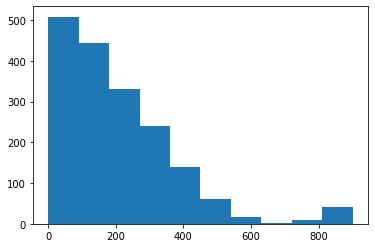

In [24]:
plt.hist(energie)
plt.show()

In [25]:
eau = data_frame['eau'].str.replace('<', ' ').str.replace(',', '.').astype('float')
eau

5       60.3
6       75.8
9       93.2
13      65.5
16      80.4
        ... 
3181    77.7
3182     2.2
3183     1.8
3184     3.0
3185     1.2
Name: eau, Length: 1792, dtype: float64

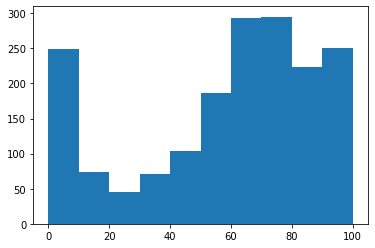

In [26]:
plt.hist(eau)
plt.show()

In [27]:
proteines = data_frame['proteines'].str.replace('<', ' ').str.replace(',', '.').astype(float)
proteines

5        4.88
6        4.50
9        0.94
13       3.79
16       0.94
        ...  
3181     3.19
3182     5.10
3183    10.00
3184     7.50
3185     8.50
Name: proteines, Length: 1792, dtype: float64

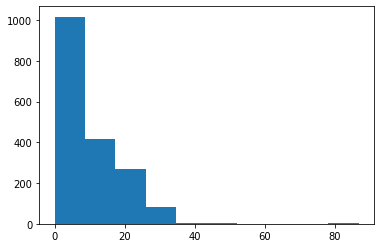

In [28]:
plt.hist(proteines)
plt.show()

In [29]:
glucides = data_frame['glucides'].str.replace('<', ' ').str.replace(',', '.').astype(float)
glucides

5       23.70
6        8.87
9        3.07
13      17.40
16       5.78
        ...  
3181    12.50
3182    88.30
3183    81.10
3184    73.30
3185    85.00
Name: glucides, Length: 1792, dtype: float64

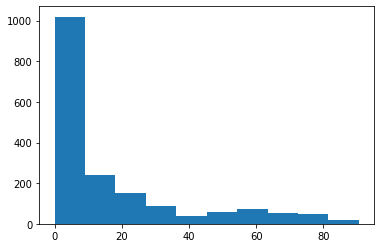

In [30]:
plt.hist(glucides)
plt.show()

In [31]:
lipides = data_frame['lipides'].str.replace('<', ' ').str.replace(',', '.').astype(float)
lipides

5        6.7
6        8.3
9        0.7
13       8.3
16       8.1
        ... 
3181     3.5
3182     1.7
3183     2.0
3184    12.3
3185     1.9
Name: lipides, Length: 1792, dtype: float64

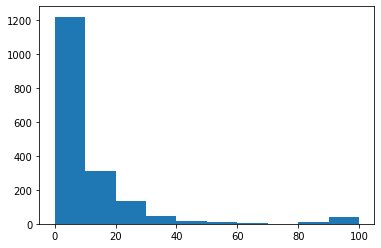

In [32]:
plt.hist(lipides)
plt.show()

In [33]:
clean_data = pd.concat([energie, eau, proteines, glucides, lipides], axis=1)

In [34]:
clean_data

,energie,eau,proteines,glucides,lipides
5,179.0,60.3,4.88,23.70,6.7
6,130.0,75.8,4.50,8.87,8.3
9,29.9,93.2,0.94,3.07,0.7
13,167.0,65.5,3.79,17.40,8.3
16,105.0,80.4,0.94,5.78,8.1
...,...,...,...,...,...
3181,100.0,77.7,3.19,12.50,3.5
3182,393.0,2.2,5.10,88.30,1.7
3183,391.0,1.8,10.00,81.10,2.0
3184,439.0,3.0,7.50,73.30,12.3


In [35]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1792 entries, 5 to 3185
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   energie    1792 non-null   float64
 1   eau        1792 non-null   float64
 2   proteines  1792 non-null   float64
 3   glucides   1792 non-null   float64
 4   lipides    1792 non-null   float64
dtypes: float64(5)
memory usage: 84.0 KB


In [36]:
from pandas import set_option
import seaborn as sns

In [37]:
set_option('display.width', 100)
set_option('precision', 3)
correlations = clean_data.corr(method='pearson')
print(correlations)

           energie    eau  proteines  glucides  lipides
energie      1.000 -0.850      0.122     0.384    0.845
eau         -0.850  1.000     -0.200    -0.682   -0.482
proteines    0.122 -0.200      1.000    -0.142   -0.004
glucides     0.384 -0.682     -0.142     1.000   -0.112
lipides      0.845 -0.482     -0.004    -0.112    1.000


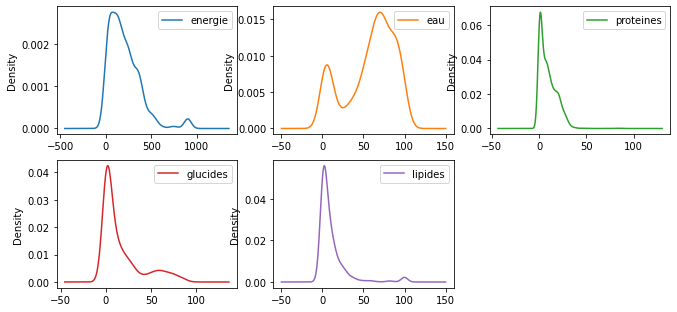

In [38]:
clean_data.plot(kind='density', layout=(3, 3), figsize=(11, 8), sharex=False, sharey=False, subplots=True)
plt.show()

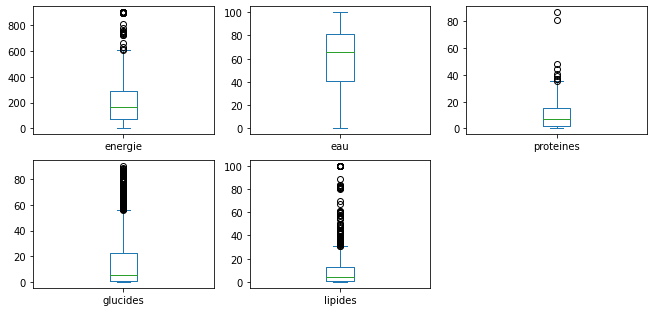

In [39]:
clean_data.plot(kind='box', layout=(3, 3), figsize=(11, 8), sharex=False, sharey=False, subplots=True)
plt.show()

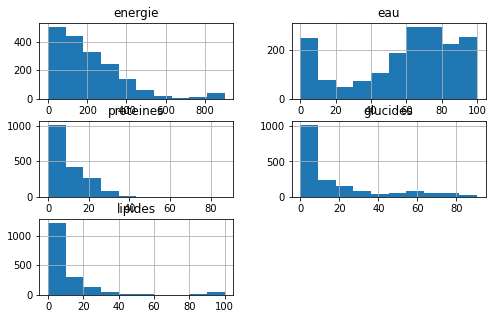

In [40]:
clean_data.hist(figsize=(8, 5))
plt.show()

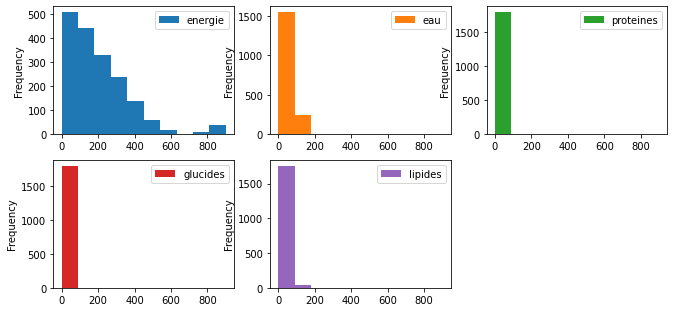

In [41]:
clean_data.plot(kind='hist', layout=(3, 3), figsize=(11, 8), sharex=False, sharey=False, subplots=True)
plt.show()

In [42]:
clean_data.columns, 
names = ['energie', 'eau', 'proteines', 'glucides', 'lipides']

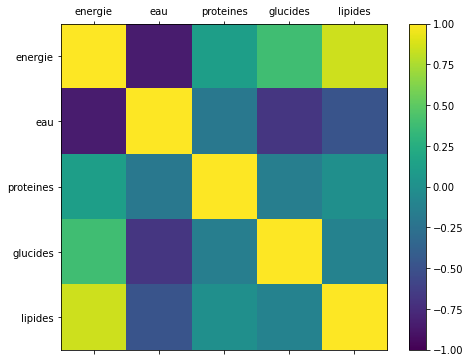

In [43]:
correlations = clean_data.corr()
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 5, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

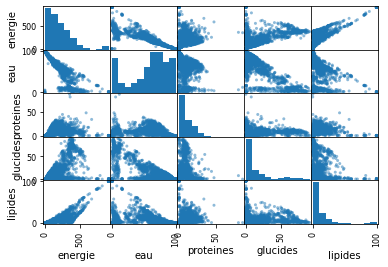

In [44]:
from pandas.plotting import scatter_matrix
scatter_matrix(clean_data)
plt.show()

<em>L'énergie et l'eau sont fortement corrélées, cependant négativement.
Les quantittés de lipides et d'énergie sont fortement et positivement corrélées.</em>

### Let's cluster foods using only two constituents ( Energy and Water )
<em> This helps keep things in two dimensions for better visualization </em>

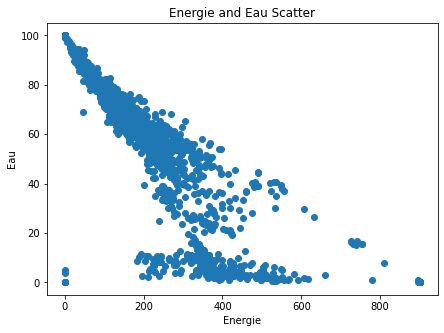

In [45]:
data = clean_data[['energie', 'eau']].values
plt.figure(figsize=(7, 5))
plt.scatter(data[:, 0], data[:, 1])
plt.xlabel("Energie")
plt.ylabel("Eau")
plt.title("Energie and Eau Scatter")
plt.show()

### <em>`Seeing the plot above, we can think of at least three clusters.`</em>

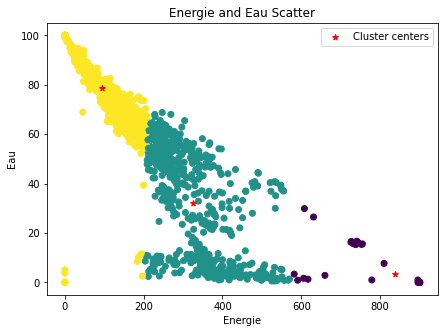

In [46]:
model = KMeansFromScratch(n_clusters=3, n_iterations=300, random_state=47)
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
X = clean_data[['energie', 'eau']].values

clusters, cluster_indexes = model.fit(X)
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_indexes)
plt.scatter(model.centroids_[:, 0], model.centroids_[:, 1], c='r', marker='*', label='Cluster centers')
plt.xlabel("Energie")
plt.ylabel("Eau")
plt.title("Energie and Eau Scatter")
plt.legend()
plt.show()

In [48]:
model.inertia()

10153359.483731221

Some yellow and blue points in the above plot do not look to have been well clustered (classified). This could be due to the number of iterations which is just 7.
Let's increase it, and see. The inertia value is very high.<em>`Can we improve it ?`</em>

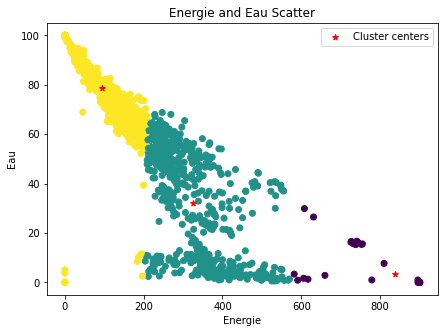

In [224]:
model = KMeansFromScratch(n_clusters=3, n_iterations=600, random_state=47)
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
X = clean_data[['energie', 'eau']].values

clusters, cluster_indexes = model.fit(X)
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_indexes)
plt.scatter(model.centroids_[:, 0], model.centroids_[:, 1], c='r', marker='*', label='Cluster centers')
plt.xlabel("Energie")
plt.ylabel("Eau")
plt.title("Energie and Eau Scatter")
plt.legend()
plt.show()

In [225]:
model.inertia()

10153359.483731221

There is no unfortunately any improvement ! Let's variate the number of clusters.

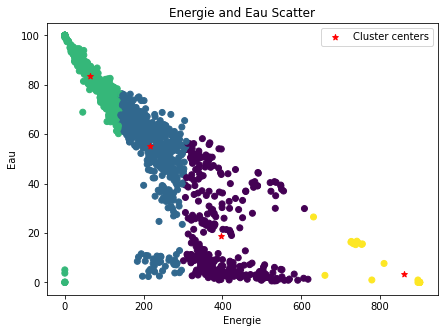

In [226]:
model = KMeansFromScratch(n_clusters=4, n_iterations=600, random_state=47)
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
X = clean_data[['energie', 'eau']].values

clusters, cluster_indexes = model.fit(X)
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_indexes)
plt.scatter(model.centroids_[:, 0], model.centroids_[:, 1], c='r', marker='*', label='Cluster centers')
plt.xlabel("Energie")
plt.ylabel("Eau")
plt.title("Energie and Eau Scatter")
plt.legend()
plt.show()

In [227]:
model.inertia()

5169208.1118518105

There is a tremendous improvement, the inertia goes down by half. This ensure that the required number of clusters
for this data set, given the choosen covariates might better. Let's try on the whole chosen covariates

In [228]:
model = KMeansFromScratch(n_clusters=4, n_iterations=100, random_state=47)
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
X = clean_data[headers].values

clusters, cluster_indexes = model.fit(X)
model.inertia()

5887544.911315488

In [229]:
model = KMeansFromScratch(n_clusters=4, n_iterations=300, random_state=47)
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
X = clean_data[headers].values

clusters, cluster_indexes = model.fit(X)
model.inertia()

5887544.911315488

In [230]:
model = KMeansFromScratch(n_clusters=4, n_iterations=600, random_state=47)
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
X = clean_data[headers].values

clusters, cluster_indexes = model.fit(X)
model.inertia()

5887544.911315488

In [231]:
model = KMeansFromScratch(n_clusters=4, n_iterations=900, random_state=47)
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
X = clean_data[headers].values

clusters, cluster_indexes = model.fit(X)
model.inertia()

5887544.911315488

In [232]:
model = KMeansFromScratch(n_clusters=4, n_iterations=1200, random_state=47)
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
X = clean_data[headers].values

clusters, cluster_indexes = model.fit(X)
model.inertia()

5887544.911315488

In [233]:
model = KMeansFromScratch(n_clusters=4, n_iterations=1500, random_state=47)
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
X = clean_data[headers].values

clusters, cluster_indexes = model.fit(X)
model.inertia()

5887544.911315488

In [234]:
model = KMeansFromScratch(n_clusters=4, n_iterations=1800, random_state=47)
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
X = clean_data[headers].values

clusters, cluster_indexes = model.fit(X)
model.inertia()

5887544.911315488

In [87]:
model.inertia()

10997897.082318077

### <em>`Using the elbow method to select the number of clusters.`</em>

In [165]:
from sklearn.cluster import KMeans

In [181]:
inertias = []
K = [x for x in range(1, 11)]
for k in K:
    kmeans = KMeans(n_clusters=k, max_iter=10000)
    fit = kmeans.fit(X)
    inertias.append(fit.inertia_)

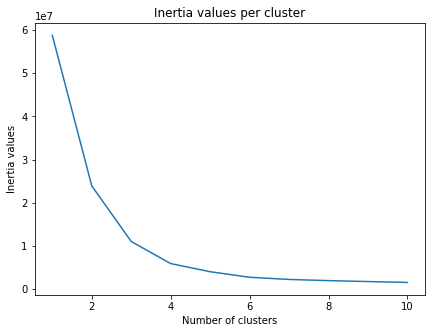

In [182]:
plt.figure(figsize=(7, 5))
plt.plot(K, inertias)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia values")
plt.title("Inertia values per cluster")
plt.show()

### <em>`The best number of clusters is 4.`</em>

In [211]:
X

array([[179.  ,  60.3 ,   4.88,  23.7 ,   6.7 ],
       [130.  ,  75.8 ,   4.5 ,   8.87,   8.3 ],
       [ 29.9 ,  93.2 ,   0.94,   3.07,   0.7 ],
       ...,
       [391.  ,   1.8 ,  10.  ,  81.1 ,   2.  ],
       [439.  ,   3.  ,   7.5 ,  73.3 ,  12.3 ],
       [396.  ,   1.2 ,   8.5 ,  85.  ,   1.9 ]])

In [188]:
inertia_values = []
K = [x for x in range(1, 2)]
K

[1]

In [222]:
k = 4
model = KMeansFromScratch(n_clusters=k, n_iterations=700, random_state=47)
r = model.fit(X)
model.inertia()

5887544.911315488

In [223]:
k = 4
model = KMeansFromScratch(n_clusters=k, n_iterations=1200, random_state=47)
r = model.fit(X)
model.inertia()

5887544.911315488

In [221]:
model.clusters_[0]

array([[399.  ,  30.3 ,  16.2 ,  22.7 ,  26.6 ],
       [306.  ,  39.4 ,   8.15,  30.9 ,  16.  ],
       [306.  ,  34.4 ,   9.53,  38.8 ,  11.8 ],
       ...,
       [391.  ,   1.8 ,  10.  ,  81.1 ,   2.  ],
       [439.  ,   3.  ,   7.5 ,  73.3 ,  12.3 ],
       [396.  ,   1.2 ,   8.5 ,  85.  ,   1.9 ]])

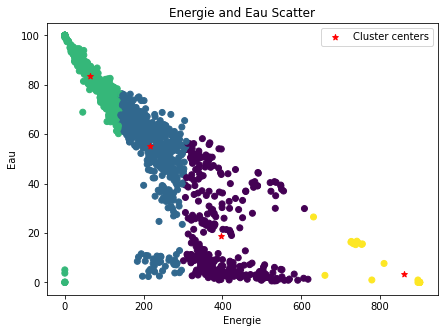

In [132]:
model = KMeansFromScratch(n_clusters=4, n_iterations=50, random_state=47)
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
X = clean_data[['energie', 'eau']].values

clusters, cluster_indexes = model.fit(X)

plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_indexes)
plt.scatter(model.centroids_[:, 0], model.centroids_[:, 1], c='r', marker='*', label='Cluster centers')
plt.xlabel("Energie")
plt.ylabel("Eau")
plt.title("Energie and Eau Scatter")
plt.legend()
plt.show()

Before 
[[ 65.4  87.5]
 [ 31.1  92. ]
 [  0.   99.9]
 [327.   21.5]
 [144.   67.5]]


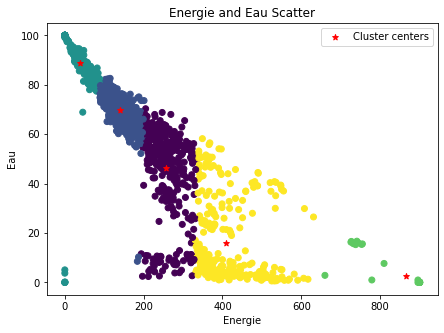

In [313]:
model = KMeansFromScratch(n_clusters=5, n_iterations=200, random_state=47)
headers = ['energie', 'eau', 'proteines', 'glucides', 'lipides']
X = clean_data[['energie', 'eau']].values

clusters, cluster_indexes = model.fit(X)

plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=cluster_indexes)
plt.scatter(model.centroids_[:, 0], model.centroids_[:, 1], c='r', marker='*', label='Cluster centers')
plt.xlabel("Energie")
plt.ylabel("Eau")
plt.title("Energie and Eau Scatter")
plt.legend()
plt.show()